In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
num_node = 13
for i in range(1,num_node+1):
    w_name = 'w'+str(i)
    print('grep '+w_name)
    bashCommand = "grep -n "+w_name+"\  log.log > tmp_"+w_name+".txt"  
    os.system(bashCommand)
    
bashCommand = "grep Scene log.log > tmp_scene.txt "  
os.system(bashCommand)

bashCommand2 = "grep Summary log.log > tmp_summary.txt "  
os.system(bashCommand2)

grep w1
grep w2
grep w3
grep w4
grep w5
grep w6
grep w7
grep w8
grep w9
grep w10
grep w11
grep w12
grep w13


0

In [3]:
fscene2 = open("tmp_summary.txt", "r")
sceneline2 = fscene2.readline()
print(sceneline2)
for element in sceneline2.split(','):
    if 'elapsed' in element:
        print(element)
        episode_elapse_time = float(element.split(':')[1])
    if 'successes' in element:
        print(element)
        all_success = element.split(':')[1]
print(episode_elapse_time, all_success)


[INFO] [1727863085.793668514] [maze_solver]: Summary Kp:1.400000,Ki:0.050000,Kd:0.000000,Kp_angle:1.200000,Ki_angle:0.005000,Kd_angle:0.005000,total elapsed time:123205071,all successes:Y

total elapsed time:123205071
all successes:Y

123205071.0 Y



In [4]:
fscene = open("tmp_scene.txt", "r")
sceneline = fscene.readline()
print(sceneline)
for element in sceneline.split(','):
    print(element)
    if 'Kp:' in element:
        print(element)
        Kp = float(element.split(':')[1])
    if 'Ki:' in element:
        print(element)
        Ki = float(element.split(':')[1])
    if 'Kd:' in element:
        print(element)
        Kd = float(element.split(':')[1])
    if 'Kp_angle' in element:
        print(element)
        Kp_angle = float(element.split(':')[1])
    if 'Ki_angle' in element:
        print(element)
        Ki_angle = float(element.split(':')[1])
    if 'Kd_angle' in element:
        print(element)
        Kd_angle = float(element.split(':')[1])
        
print('Kp:{},Ki:{},Kd:{},Kp_angle:{},Ki_angle:{},Kd_angle:{}'.format(Kp,Ki,Kd,Kp_angle,Ki_angle,Kd_angle))
        

[INFO] [1727862960.454361483] [maze_solver]: Simulation Scene,Kp:1.400000,Ki:0.050000,Kd:0.000000,Kp_angle:1.200000,Ki_angle:0.005000,Kd_angle:0.005000

[INFO] [1727862960.454361483] [maze_solver]: Simulation Scene
Kp:1.400000
Kp:1.400000
Ki:0.050000
Ki:0.050000
Kd:0.000000
Kd:0.000000
Kp_angle:1.200000
Kp_angle:1.200000
Ki_angle:0.005000
Ki_angle:0.005000
Kd_angle:0.005000

Kd_angle:0.005000

Kp:1.4,Ki:0.05,Kd:0.0,Kp_angle:1.2,Ki_angle:0.005,Kd_angle:0.005


# Moving

In [5]:
start_line_list = []
end_line_list = []

for i in range(1,num_node+1):
    w_name = 'w'+str(i)
    fff = open("tmp_"+w_name+".txt" , "r")
    mylinefff = fff.readline()
    
    while mylinefff: 
        if 'start move' in mylinefff:
            start_line_no = int(mylinefff.split(":")[0]) 
            #print(start_line_no)
            start_line_list.append(start_line_no)
        if 'end move' in mylinefff:
            end_line_no = int(mylinefff.split(":")[0])
            #print(end_line_no)
            end_line_list.append(end_line_no)

        mylinefff = fff.readline()
    fff.close()
    #print(start_line_list)
    #print(end_line_list)

start_end_line_list = [ (start_line_list[i], end_line_list[i]) for i in range(len(start_line_list)) ]
print(start_end_line_list)

[(56, 1963), (5098, 7360), (10215, 12132), (14737, 16629), (19429, 21151), (23936, 25793), (28663, 30555), (33240, 35267), (38332, 40114), (43004, 44776), (47966, 49828), (52863, 54720), (56985, 58832)]


In [6]:
print(len(start_end_line_list))
for i in range(num_node):
    w_name = 'w'+str(i+1)
    sedarg = "'"+str(start_end_line_list[i][0])+","+str(start_end_line_list[i][1])+"p'"
    print(sedarg)
    bashCommand = "sed -n "+sedarg+" log.log | grep Current | cut -d \"|\" -f 2,3,4,5,6 > log_"+w_name+"_move.log " 
    os.system(bashCommand)

aggregrate_log_data = []
for i in range(num_node):
    w_name = 'w'+str(i+1)
    f = open("log_"+w_name+"_move.log", "r")
    custom_log_data = []
    myline = f.readline()
    while myline:
        #print(myline)
        myline = f.readline()
        custom_log_data.append(myline)        
    f.close() 
    aggregrate_log_data.append(custom_log_data)
    
print(len(aggregrate_log_data))

13
'56,1963p'
'5098,7360p'
'10215,12132p'
'14737,16629p'
'19429,21151p'
'23936,25793p'
'28663,30555p'
'33240,35267p'
'38332,40114p'
'43004,44776p'
'47966,49828p'
'52863,54720p'
'56985,58832p'
13


In [7]:
aggregrate_df = []
for log_data in aggregrate_log_data:
    data = {'Goal_x': [], 'Goal_y': [], 'Current_x': [], 'Current_y': []}
    for line in log_data:
        #print(line.split('|'))
        for element in line.split("|"):
            for sub_element in element.split(","):
                if 'Goal_x:' in sub_element:
                    data['Goal_x'].append(float(sub_element.split(":")[1].strip().replace(')', '')))
                    #print(sub_element.split(":")[1].strip())
                if 'Goal_y:' in sub_element:
                    data['Goal_y'].append(float(sub_element.split(":")[1].strip().replace(')', '')))
                    #print(sub_element.split(":")[1].strip())   
                if 'Current_x:' in sub_element:
                    data['Current_x'].append(float(sub_element.split(":")[1].strip().replace(')', '')))
                    #print(sub_element.split(":")[1].strip())
                if 'Current_y:' in sub_element:
                    data['Current_y'].append(float(sub_element.split(":")[1].strip().replace(')', '')))
                    #print(sub_element.split(":")[1].strip())
    df = pd.DataFrame(data)
    print(df)
    aggregrate_df.append(df)
print(len(aggregrate_df))

     Goal_x  Goal_y  Current_x  Current_y
0      0.48     0.0   0.000000   0.000000
1      0.48     0.0   0.000000   0.000000
2      0.48     0.0   0.000000   0.000000
3      0.48     0.0   0.000000   0.000000
4      0.48     0.0   0.000000   0.000000
..      ...     ...        ...        ...
375    0.48     0.0   0.471716   0.000004
376    0.48     0.0   0.471716   0.000004
377    0.48     0.0   0.471716   0.000004
378    0.48     0.0   0.471716   0.000004
379    0.48     0.0   0.471716   0.000004

[380 rows x 4 columns]
       Goal_x    Goal_y  Current_x  Current_y
0    0.522307 -1.341235   0.478791   0.001010
1    0.522307 -1.341235   0.478791   0.001010
2    0.522307 -1.341235   0.478791   0.001010
3    0.522307 -1.341235   0.478791   0.001010
4    0.522307 -1.341235   0.478791   0.001010
..        ...       ...        ...        ...
446  0.522307 -1.341235   0.521911  -1.336976
447  0.522307 -1.341235   0.522203  -1.344167
448  0.522307 -1.341235   0.522203  -1.344167
449  0.52230

<Figure size 432x288 with 0 Axes>

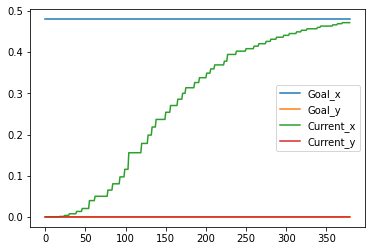

<Figure size 432x288 with 0 Axes>

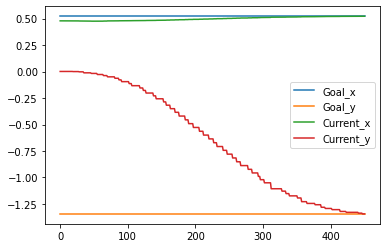

<Figure size 432x288 with 0 Axes>

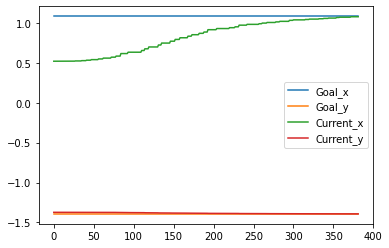

<Figure size 432x288 with 0 Axes>

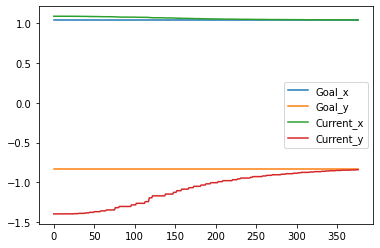

<Figure size 432x288 with 0 Axes>

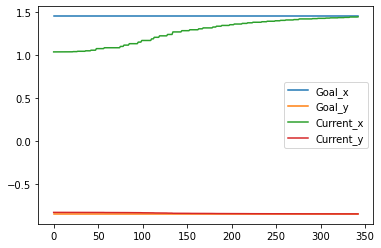

<Figure size 432x288 with 0 Axes>

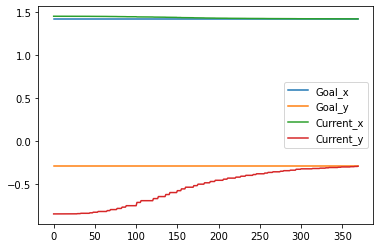

<Figure size 432x288 with 0 Axes>

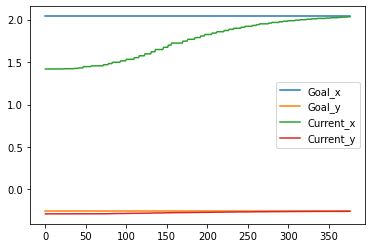

<Figure size 432x288 with 0 Axes>

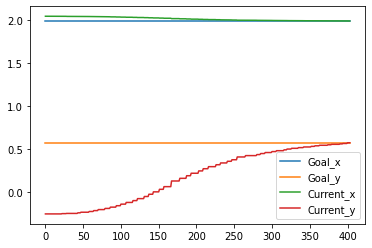

<Figure size 432x288 with 0 Axes>

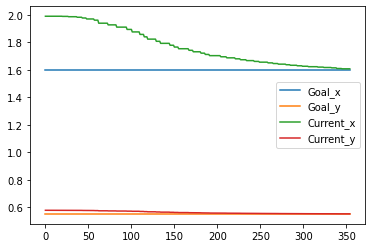

<Figure size 432x288 with 0 Axes>

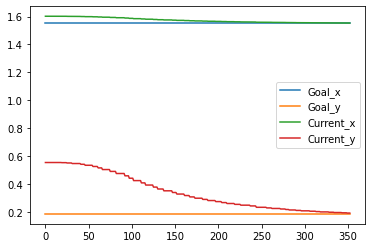

<Figure size 432x288 with 0 Axes>

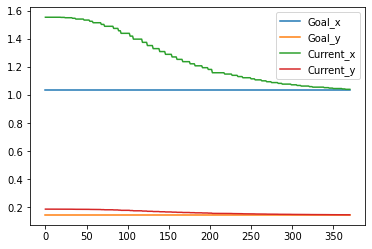

<Figure size 432x288 with 0 Axes>

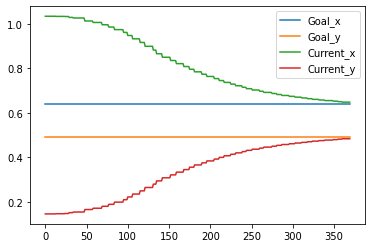

<Figure size 432x288 with 0 Axes>

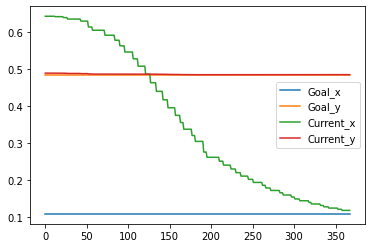

In [8]:
plt_i = 0
for dfe in aggregrate_df:
    plt.figure(plt_i)
    dfe.plot()
    plt.show()
    i += 1

# Rotating

In [9]:
start_line_list = []
end_line_list = []

for i in range(1,num_node+1):
    w_name = 'w'+str(i)
    fff = open("tmp_"+w_name+".txt" , "r")
    mylinefff = fff.readline()
    
    while mylinefff: 
        if 'start face' in mylinefff:
            start_line_no = int(mylinefff.split(":")[0]) 
            #print(start_line_no)
            start_line_list.append(start_line_no)
        if 'end face' in mylinefff:
            end_line_no = int(mylinefff.split(":")[0])
            #print(end_line_no)
            end_line_list.append(end_line_no)

        mylinefff = fff.readline()
    fff.close()
    #print(start_line_list)
    #print(end_line_list)

start_end_line_list = [ (start_line_list[i], end_line_list[i]) for i in range(len(start_line_list)) ]
print(start_end_line_list)

[(3, 55), (1965, 5097), (7362, 10214), (12134, 14736), (16631, 19428), (21153, 23935), (25795, 28662), (30557, 33239), (35269, 38331), (40116, 43003), (44778, 47965), (49830, 52862), (54722, 56984)]


In [10]:
print(len(start_end_line_list))
for i in range(num_node):
    w_name = 'w'+str(i+1)
    sedarg = "'"+str(start_end_line_list[i][0])+","+str(start_end_line_list[i][1])+"p'"
    print(sedarg)
    bashCommand = "sed -n "+sedarg+" log.log | grep Current | cut -d \"|\" -f 2,3,4,5,6 > log_"+w_name+"_face.log " 
    os.system(bashCommand)

aggregrate_log_data = []
for i in range(1,num_node):
    w_name = 'w'+str(i+1)
    f = open("log_"+w_name+"_face.log", "r")
    custom_log_data = []
    myline = f.readline()
    while myline:
        #print(myline)
        myline = f.readline()
        custom_log_data.append(myline)        
    f.close() 
    aggregrate_log_data.append(custom_log_data)
    
print(len(aggregrate_log_data))

13
'3,55p'
'1965,5097p'
'7362,10214p'
'12134,14736p'
'16631,19428p'
'21153,23935p'
'25795,28662p'
'30557,33239p'
'35269,38331p'
'40116,43003p'
'44778,47965p'
'49830,52862p'
'54722,56984p'
12


In [11]:
aggregrate_df = []
for log_data in aggregrate_log_data:
    data = {'theta_goal': [], 'current_yaw': []}
    for line in log_data:
        #print(line.split('|'))
        for element in line.split("|"):
            for sub_element in element.split(","):
                if 'thetag:' in sub_element:
                    data['theta_goal'].append(float(sub_element.split(":")[1].strip().replace(')', '')))
                    #print(sub_element.split(":")[1].strip())
                if 'current_yaw:' in sub_element:
                    data['current_yaw'].append(float(sub_element.split(":")[1].strip().replace(')', '')))
                    #print(sub_element.split(":")[1].strip())   
    df = pd.DataFrame(data)
    print(df)
    aggregrate_df.append(df)
print(len(aggregrate_df))

     theta_goal  current_yaw
0     -1.534893     0.000590
1     -1.534893     0.000590
2     -1.534893     0.000590
3     -1.534893     0.000590
4     -1.534893     0.000590
..          ...          ...
620   -1.538386    -1.528697
621   -1.538386    -1.528697
622   -1.538388    -1.529763
623   -1.538388    -1.529763
624   -1.538388    -1.529763

[625 rows x 2 columns]
     theta_goal  current_yaw
0     -0.086970    -1.529417
1     -0.086970    -1.529417
2     -0.074621    -1.528293
3     -0.074621    -1.528293
4     -0.074621    -1.528293
..          ...          ...
564   -0.035618    -0.043232
565   -0.035618    -0.043232
566   -0.035618    -0.043232
567   -0.035618    -0.043232
568   -0.035602    -0.043232

[569 rows x 2 columns]
     theta_goal  current_yaw
0      1.639795    -0.041495
1      1.639795    -0.041495
2      1.644296    -0.041969
3      1.644296    -0.041969
4      1.644296    -0.041969
..          ...          ...
514    1.653480     1.649123
515    1.653480     1.64

<Figure size 432x288 with 0 Axes>

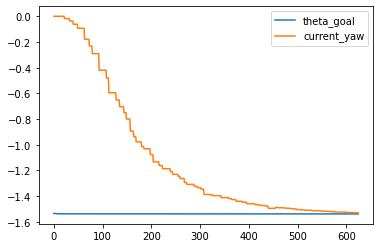

<Figure size 432x288 with 0 Axes>

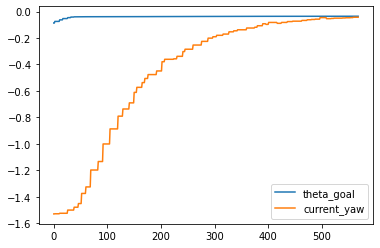

<Figure size 432x288 with 0 Axes>

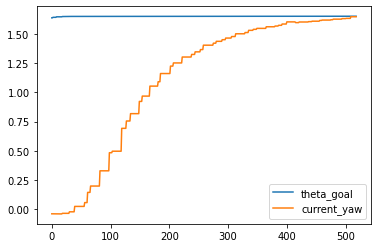

<Figure size 432x288 with 0 Axes>

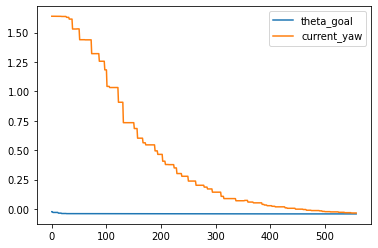

<Figure size 432x288 with 0 Axes>

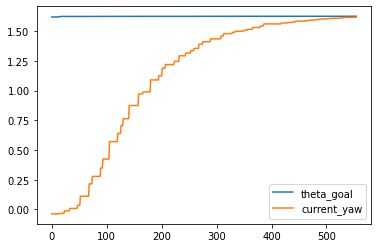

<Figure size 432x288 with 0 Axes>

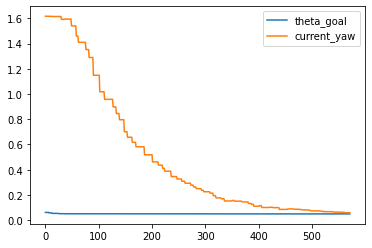

<Figure size 432x288 with 0 Axes>

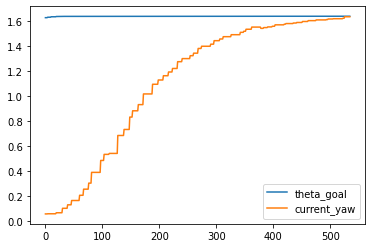

<Figure size 432x288 with 0 Axes>

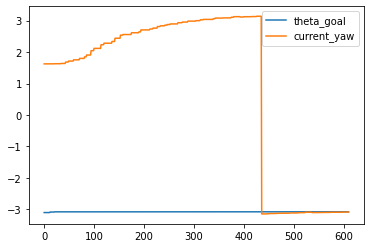

<Figure size 432x288 with 0 Axes>

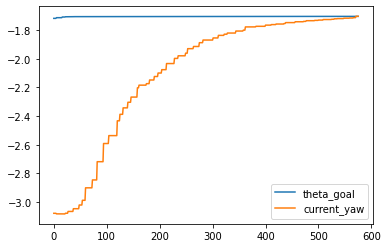

<Figure size 432x288 with 0 Axes>

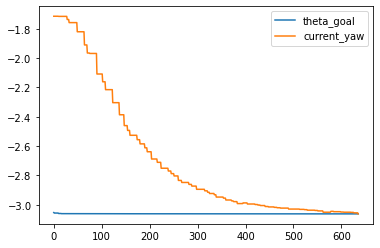

<Figure size 432x288 with 0 Axes>

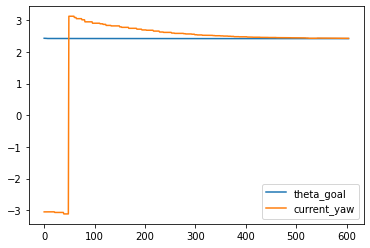

<Figure size 432x288 with 0 Axes>

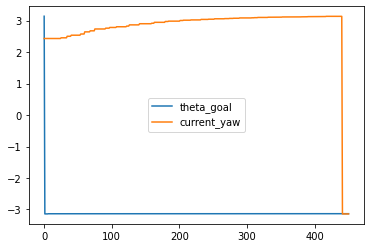

In [12]:
plt_i = 0
for dfe in aggregrate_df:
    plt.figure(plt_i)
    dfe.plot()
    plt.show()
    i += 1

In [13]:
for i in range(1,num_node+1):
    print(i)
    
for j in range(num_node):
    print(j+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
